In [53]:
from sklearn.metrics import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn import preprocessing, tree
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import random
import scipy as sp
from scipy.stats import binom


## DECISION TREES PART 2

##### In this exercises (DT Part 2), we explore the behavior of deceision trees when datasets are variated. Additionally we will train and evaluate a decision tree classifier for a wine dataset.

## Exercise 1

Input features are often normalized before training ML models. How do you think decision trees would be affected if a dataset was differently:
- centered? 
- scaled? 
- rotated?

Use the functions syn1 or syn2 from Exercise_DT_setup.jpynb to create a dataset.
Train decision trees with max_depth=2 for the original data, differently centered, scaled, and rotated data.

- Does the result match your expectation?
- How does it compare to other algorithms you have used on this course.

In [54]:
# From Exercise_DT_setup -- synthetic 2D binary classification problems

def syn1(N):
    """ data(samples, features)"""
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)
  
    data[:N1,0] = 4 + np.random.normal(loc=.0, scale=1., size=(N1))
    data[N1:,0] = -4 + np.random.normal(loc=.0, scale=1., size=(N-N1))
    data[:,1] = 10*np.random.normal(loc=.0, scale=1., size=(N))
    
    
    data = data / data.std(axis=0)
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    # Rotation
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]) # rotation matrix
    data = np.dot(data,R) 
    
    return data,tar

def syn2(N):
    """ data(samples, features)"""
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    data[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))
    # Negative samples 
    data[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))

    return data,tar

In [55]:
# Rotating function...

def rotate(p, origin=(0, 0), degrees=0):
    
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

In [56]:
# Generate data and transform

Xo, y = syn1(100)

# Transformations to data
# * Center and scale
Xcs = preprocessing.StandardScaler(copy=True).fit_transform(Xo)
# * Rotate
Xr = rotate(Xcs, origin=(0, 0), degrees=45)

# Save all data into a single list, important for later use
X = [Xo, Xcs, Xr]

In [57]:
# Train DTs
dt1 = DecisionTreeClassifier(max_depth=2, random_state=42).fit(Xo, y)
dt2 = DecisionTreeClassifier(max_depth=2, random_state=42).fit(Xcs, y)
dt3 = DecisionTreeClassifier(max_depth=2, random_state=42).fit(Xr, y)
clfs = [dt1, dt2, dt3]

/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/1589807267.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[i][:, 0], y=X[i][:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/1589807267.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[i][:, 0], y=X[i][:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/1589807267.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[i][:, 0], y=X[i][:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)


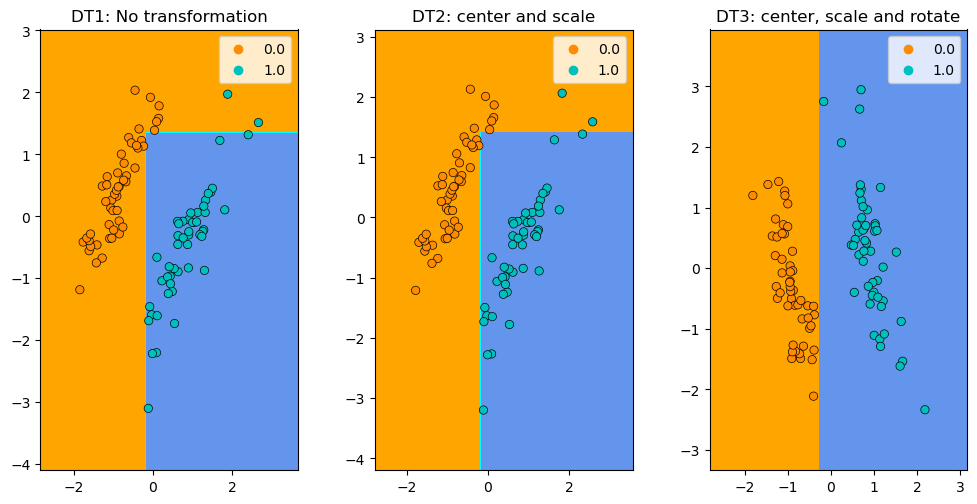

In [58]:
# Visualize
# Define plot
fig, axs = plt.subplots(1, 3, figsize=(10, 5));
plt.tight_layout();
fig.subplots_adjust(wspace=0.3, hspace=.5);

# Define color schemes
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Define titles
titles = ["DT1: No transformation", "DT2: center and scale", "DT3: center, scale and rotate"]

# Mesh step
h = 0.02

for i, ax in enumerate(axs):

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[i][:, 0].min() - 1, X[i][:, 0].max() + 1
    y_min, y_max = X[i][:, 1].min() - 1, X[i][:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[i][:, 0], y=X[i][:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    ax.set_title(titles[i]);

Rotating the data is the only transformation that would affect the decision tree...

- Centering data. Centering is essentialy shifting data up, down, left or right. This would not matter since DT draws lines perpendicular to feature axes. Therefore, the shape of boundary stays the same, but of course the decision thresholds might change for each feature.

- Scaling data. Same as above, it would not matter for DT, since it would still draw a straight line between any of the values of the particlar feature. It does not matter if the distances between values are scaled or not.

- Rotation of data. Here it would matter since for example if the data would be easily separable using a straight line going from one of the features and then we would rotate our data, our decision boundary would look way different. Since we might need more features to make the split. And as a result, the decision boundary would change.

Most of the algorithms that we have encountered so far have been parametric, i.e., they were combining features using estimated parameters. As such they were dependent on the scaling. This is not problem for DT clearly which in fact is actually a nice advantage. When it comes to transformations such as rotation, that is a different story. Compare to the other two transformations, rotation is non-linear. More importantly, however, if we think about what changes in terms of final decision, then nothing, we would still make the same prediction.

## Exercise 2

The structure of a tree is sensitive to the exact training data. Here we simulate the effect of random sampling by regenerating a synthetic dataset with various random seeds.
- Use a known random seed for generating the syn2 data. Then train a decision tree on it, use for example min_samples_leaf=5 to regularize
- Regenerate the syn2 dataset with a different random seed, to simulate the effect of a different random sample from the same underlying distribution
- Train the decision tree again.
- How different or similar are the trees?
- How do you imagine this would be if we had 100 input features instead of 2?
- Flip the class assignment of one or a few data points (to simulate mislabeled data) and train the decision tree again . What is the effect? (Try e.g. using seed=42 when generating the dataset and flipping class assignment of the last training instance)
- What does all this mean in terms of model varinace? and in terms of usefulness of the decision rules?

/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/2722143092.py:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/2722143092.py:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_17696/2722143092.py:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)


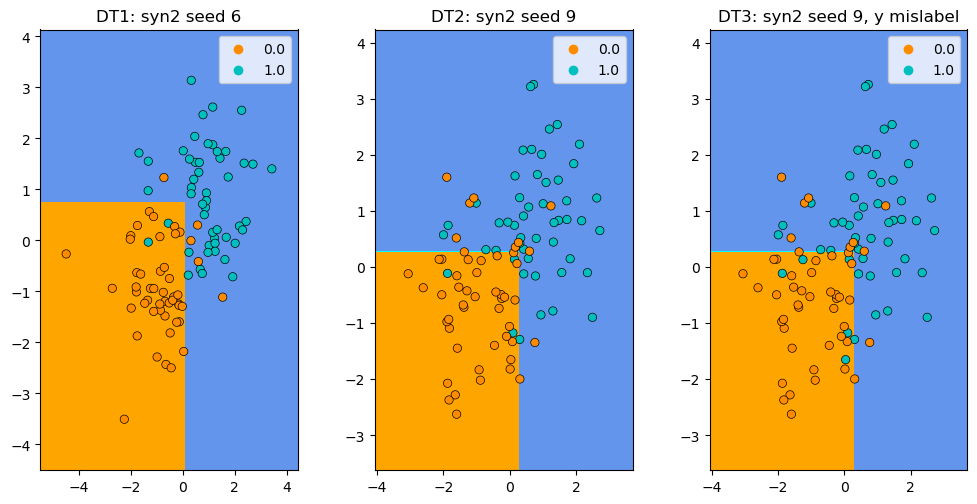

In [59]:
# Define plot
fig, axs = plt.subplots(1, 3, figsize=(10, 5));
plt.tight_layout();
fig.subplots_adjust(wspace=0.3, hspace=.5);

# Define seeds
seeds = [6, 9, 9]

# Define titles
titles = ["DT1: syn2 seed 6", "DT2: syn2 seed 9", "DT3: syn2 seed 9, y mislabel"]

# Show the subplots
for i, ax in enumerate(axs):

    # seed = 0 means random, seed > 0 means fixed
    np.random.seed(seeds[i])
        
    # Generate training data
    X, y = syn2(100)

    # Mislabel couple points (last subplot only)
    if i == 2:
        y[-1] = 0 if y[-1] == 1 else 1
        y[-5] = 0 if y[-5] == 1 else 1

    # Train a decision Tree
    clf = DecisionTreeClassifier(max_depth=2, random_state=seeds[i], min_samples_leaf=5).fit(X, y)

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    ax.set_title(titles[i]);

We can see a clear change when it comes to having a completely new dataset. Here we only have 2 features, but if we had way more features, then the possible combination of boundaries increase exponentially. 

By swapping a couple labels, we can not see a big effect. However, this also depends on which points we are swapping labels. Decision trees are particulary sensitive to points near the boundaries. 

Decision trees are known for their high variance, meaning they can produce significantly different models with slight changes in the training data. A few mislabeled points can cause the decision tree to form different splits, leading to a model that might look quite different from the original.

## Exercise 3

Here we train a decision tree classifier for a wine dataset for illustration, but you are of course welcome to also try on any other data set you want.

The wine dataset is a very small dataset: Only 178 instances with 13 numeric attributes. There are three classes (Class_0, Class_1, Class_2). The data is the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine. 

- Load the wine dataset, and split it into training and test set (The dataset can be loaded with load_wine()). 
- Use GridSearchCV to find best parameters. Try e.g. max_leaf_node from 2 to 10, and min_samples_split from 2 to 4.
- What is the depth and number of leaves of the best tree? (Hint: Use the GridSearchCV attribute bestestimator, and the get_depth() and get_n_leaves() methods of the best tree)
- Look at the reported feature importances, which features are important? (Hint: Use the featureimportances attribute of the best tree)
- Plot the tree, does the tree match the important features above?
- Check the performance of your final classifier on the test set.

In [60]:
# Load the data
X, y = load_wine(return_X_y=True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
# Find optimal parameters with GridSearch

parameters = {'max_leaf_nodes': [i for i in range(2, 11)], 'min_samples_split': [i for i in range(2, 5)]}

dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters).fit(X_train, y_train)

print(f"Depth: {clf.best_estimator_.get_depth()} | Number of leaves: {clf.best_estimator_.get_n_leaves()}")

Depth: 3 | Number of leaves: 6


In [62]:
# Most important feature

# Get feature names
fnames = load_wine().feature_names

# Get max value of feature importance
fimpmax =  np.max(clf.best_estimator_.feature_importances_)

# Get the feature name
idx = np.where(clf.best_estimator_.feature_importances_ == fimpmax)[0][0]
print(idx, fnames[idx])

6 flavanoids


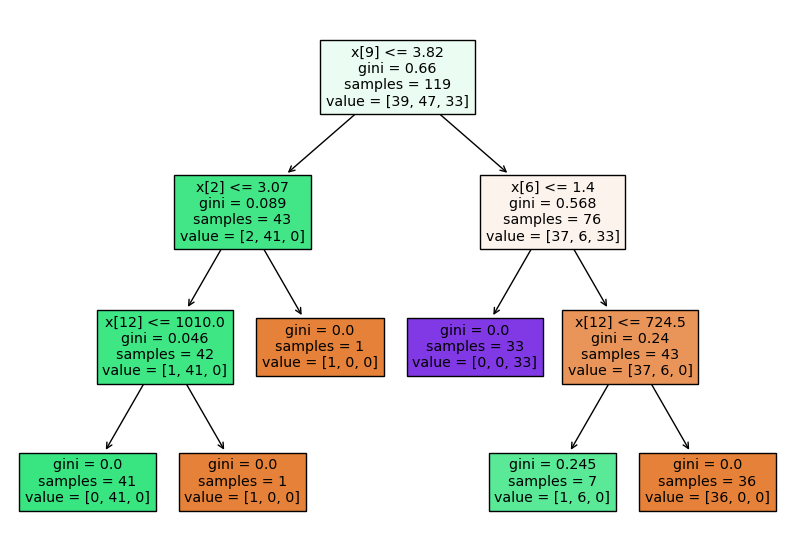

In [63]:
# Plot tree

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf.best_estimator_, filled=True)

If we plot the tree, we can see that we use flavanoids in depth 1, i.e., X[6] <= 1.4. If we would compute the weighted gini impurity of its child nodes and compare it to the parents impurity (.568), we would find out that this is the biggest reduction in impurity. Of course, if the model would be using flavanoids also somewhere else in the tree, we would need to add also the reduction of impurity from here.

In [64]:
# Performance on test data

clf.score(X_test, y_test)

0.9661016949152542

## ENSEMBLE METHODS PART 1

## Exercise 1 

#### - Explain in your own words what is a ML ensemble method and why does it work.

Briefly, the core idea behind ensemble methods is to combine several classifiers together. In general, we have two ways we can combine them:

- train several classifiers along each other and then somehow aggregate their predictions (bagging)
- train several classifiers in a sequential manner such that each classifiers tries to improve the mistakes of the previous classifier in the chain

## Exercise 2

#### - In ensemble methods, we want base-learners to be diverse. Why do we want divesrity? How can we approach it?


We must have diversity embedded into the ensemble model building. This can be done in two ways:

- diverse models: this can be as simple as changing hyper parameters, but also just choosing completely different model class
- diverse training data: we want our ensemble model to see as many different scenarios as possible, this is achieved via different training datasets

## Exercise 3

#### - Assume that a classification ensemble is composed of 5 base-learners, each of which is iid and correct with probability p > 0.5. How do you calculate the probability that a majority vote from this ensemble gives the correct answer?

Probability that the majority of the 5 learners give the correct answer is calculated as the probability that at least 3 out of 5 are correct. 

If X is the probability of the learner being correct, X follows a binomial distribution because each learner is independent and has same prob of being correct. 

$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$

Where k is number of success, and (n/k) is the binomial coefficient. 

The probability that the majority gives the correct answer should be the sum:

$$P(X \geq 3) = P(X = 3) + P(X = 4) + P(X = 5)$$



In [1]:
from scipy.special import comb

p = 0.51  # Weak p > 0.5

# Calculate the probability of getting exactly k correct predictions
def probability_of_k_correct(k, n=5, p=p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Calculate the probability that at least 3 out of 5 base learners are correct
probability_majority_correct = (
    probability_of_k_correct(3) +
    probability_of_k_correct(4) +
    probability_of_k_correct(5)
)

probability_majority_correct


0.5187450006

## Exercise 4

##### We have a classification problem with two classes Red and Green. Suppose we have traind 10 classifiers that produce estimates p(Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75.

##### - Use the two common voting approaches (hard- and soft-voting) and compute what is the final classification under each of these two approaches.

In [66]:
preds_red = np.array([.1, .15, .2, .2, .55, .6, .6, .65, .7, .75])
preds_green = np.array([1 - preds_red[i] for i in range(len(preds_red))])
preds = np.vstack((preds_red, preds_green)).T
preds

array([[0.1 , 0.9 ],
       [0.15, 0.85],
       [0.2 , 0.8 ],
       [0.2 , 0.8 ],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.7 , 0.3 ],
       [0.75, 0.25]])

In [67]:
# Hard vote --> mayority of votes

# Get the total count of clfs and then count of those who voted for green class
n = preds.shape[0]
ngreen = np.argmax(preds, axis=1).sum()

# Decide using simple hard voting
tr = n/2
if ngreen > tr:
    print("Green")
elif ngreen < tr:
    print("Red")
else:
    print(f"Random choice: {random.choice(['Red', 'Green'])}")

Red


In [68]:
# Soft vote --> class with highest probability, averaged across all the classifiers

# Compute averages
avgp_red = preds[:, 0].mean()
avgp_green = preds[:, 1].mean()

# Decide using the soft vote
if avgp_red > avgp_green:
    print("Red")
elif avgp_red < avgp_green:
    print("Green")
else:
    print(f"Random choice: {random.choice(['Red', 'Green'])}")

Green


## Exercise 5

##### Voting classifiers calculate their final output from the combined outputs of the individual base learners. The combined output can be calculated in different ways (with hard- and soft-voting being the most common). Assume an ensemble H of m base classifiers, hm (with m = 1 ... M ). Given some input x, each classifier hm predicts class probabilities for each of K output classes, so that hmk(x) , and ∑Kk=1 hmk(x) = 1.

##### The list below shows some different functions that can be used to combine the base-learner outputs to calculate the final output y^ of the whole voting classifier for input x. What does each one do? What is the effect of using each?

1. $$\hat{y} = \arg \max_k \frac{1}{M} \sum_{m=1}^M h_{mk}(x)$$

Compute average probability for each of the respective classes and then select the class with highest avg probability. This is soft vote classifier!

If the variance of probabilities for each class is large, then if for example two classifiers have a very different opinion, they cancel each other out. On the other hand, this could be also a problem since we can have classifiers which yield outlier values and then our average might be skewed.

2. $$\hat{y} = \arg \max_k \sum_{m=1}^M w_m h_{mk}(x), \quad \text{where } w_m \geq 0, \sum_{m=1}^M w_m = 1$$

Compute the weighted average for each of the respective classes and then select the class with highest avg probability.

In this case, we are given the additional freedom of giving to each classifier importance of the vote by multiplying its prediction by specific weight. 


3. $$\hat{y} = \arg \max_k \, \text{median}_m \, h_{mk}(x)$$

Compute median probability for each of the respective classes and then select the class with highest median. This method is more robust to outliers.

4. $$\hat{y} = \arg \max_k \min_m \, h_{mk}(x)$$

Compute min probability for each of the respective classes and then select the class with highest minimum.

What is the reason for a classifier to assign the given x with low probability? Perhaps, the low probability can be due to the classifiers in-ability to capture complex patterns (bias) or the opposite problem that our classifier is overfitted. I would also say that you discard a lot of information that you obtain from other classifiers.

5. $$\hat{y} = \arg \max_k \max_m \, h_{mk}(x)$$

Compute max probability for each of the respective classes and then select the class with highest maximum.

6. $$\hat{y} = \arg \max_k \prod_{m} h_{mk}(x)$$

Compute the product of probabilities for each of the respective classes and then select the class with highest product.

It is very similar to taking the mean of numbers in a sense that if you have two outliers (one small and one large), they cancel out each other in terms of the contribution to the decision. But you can also have outliers just one one side which will skew this metric.


- To summarize, which aggregation metric you choose depends on the problem at hand. As we have discussed above, each of them has its pros and cons which might be more or less suitable for your problem at hand. For instance, if we are ok with outliers in probabilities having a strong influence on our final prediction, we would go with for isntance soft voting, but perhaps we actually do not want this, and then using median might be more suitable.

## Exercise 6

We want to derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

- What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.
- What is the probability that the second bootstrap observation is not the jth observation from the original sample?
- Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^n$
- When n = 5, what is the probability that the jth observation is in the bootstrap sample?
- When n = 100, what is the probability that the jth observation is in the bootstrap sample?
- When n = 1000, what is the probability that the jth observation is in the bootstrap sample? 
- Create a plot that displays, for each integer value of n from 1 to 10000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.
- Now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. Repeatedly create bootstrap samples, and each time record whether or not the fourth observation is contained in the bootstrap sample. Comment on the obtained results.

Answer....

1. When creting a bootstrap sample of size n, we sample with replacement from the original dataset of n observations. Each observation has probability 1/n of being selected. So the probability that the first bootstrap obs is not the jth obs from the original sample is 1 - 1/n.

2. Since each draw is independent, the probability that the second sample is not the jth is the same 1 - 1/n.

3. The probability that the jth observation is not selected in any of the n draws is $(1 − 1/n)^n$.

4. Probability that the jth observation is in the bootstrap sample is the complmement that it is not, so: $1- (1 − 1/n)^n$

For n= 5, 100, 1000:


In [69]:
ns = [5, 100, 1000]

for n in ns: 
    p = (1 - 1/n)**n
    print(f'For n={n}, the probability that jth obs is in the bootstraped sample is {round(p,4)}')

For n=5, the probability that jth obs is in the bootstraped sample is 0.3277
For n=100, the probability that jth obs is in the bootstraped sample is 0.366
For n=1000, the probability that jth obs is in the bootstraped sample is 0.3677


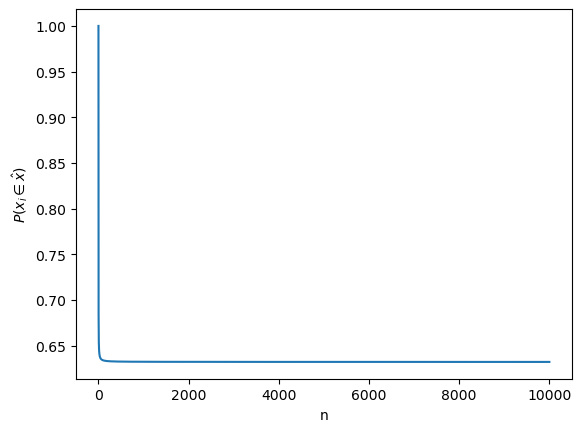

In [70]:
# Set different Ns
Ns = [i for i in range(1, 10000)]

# Create a function to compute the probability
prob = lambda n,m: 1 - (1 - 1/n)**m

# Compute the probs
probs = []
for n in Ns:
    probs.append(prob(n, n))

# Setup plot
fig, ax = plt.subplots()

# Plot the relationship
ax.plot(Ns, probs);
ax.set_xlabel("n");
ax.set_ylabel("$P(x_i \in \hat{x})$");

We can see that as n goes to infinity, the probability of the jth observation being in the bootstrapped sample converges in 0.65 In other words, this means that if we create for example 1000 bootstrapped datasets, then in roughly 650 of them the jth observation will be present. 

This is useful to know since this means that we are guaranteed (for sufficiently large n), that roughly one third of the data is not part of the training data and can be used for validation. 

In [71]:
# Simulation for n=100 and j=4

np.random.seed(42)  # for reproducibility
n = 100
num_simulations = 10000
j = 4
count_j_in_sample = 0

for _ in range(num_simulations):
    bootstrap_sample = np.random.choice(np.arange(n), size=n, replace=True)
    if j in bootstrap_sample:
        count_j_in_sample += 1

simulated_probability = count_j_in_sample / num_simulations
print(f"Prob 4th obs is in the bootstrap sample when n=100: {simulated_probability:.4f}")

Prob 4th obs is in the bootstrap sample when n=100: 0.6369


Very close to the theoretical 0.65